In [128]:
### a code for creating a histogram of SWE's 
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [129]:
print(os.getcwd())



/Users/f006fk7/Library/CloudStorage/GoogleDrive-anna.m.valentine.th@dartmouth.edu/My Drive/2_code/SWE Histogram


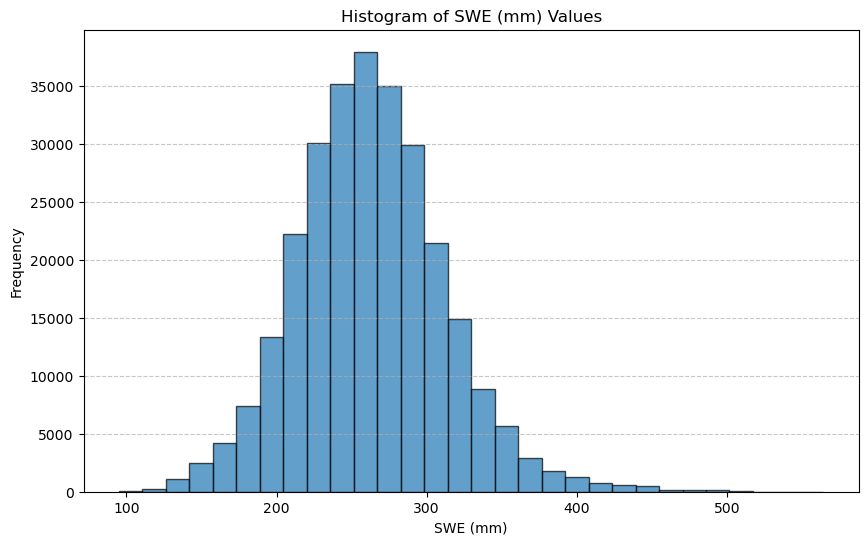

In [130]:
# Define the file path
ASO_path = "/ASO_SWE_Obs/SNEX20_GM_SWE_SD_Lidar-GPR_20200201_v01.0.csv"  # Adjust the path if needed

# Load the CSV file into a Pandas DataFrame
ASO_df = pd.read_csv(os.getcwd() + ASO_path)

# Convert the "SWE (mm)" column to a list of integers
swe_list = ASO_df["SWE (mm)"].dropna().astype(float).tolist()

# Plot histogram of SWE values
plt.figure(figsize=(10, 6))
plt.hist(swe_list, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("SWE (mm)")
plt.ylabel("Frequency")
plt.title("Histogram of SWE (mm) Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [131]:
### onto the next file! (need CMP3 since this is fresh snow)
# Define the file path
GPR_path = "/GPR_GroundObs_SWE/SNEX20_BSU_CMP_SWE_02012020_CMP3_HH.csv"  # Adjust the path if needed

# Load the CSV file into a Pandas DataFrame
GPR_df = pd.read_csv(os.getcwd() + GPR_path)

# Extract the "sweNMO1" and "sweLMO1" columns into lists of floats
sweNMO1 = GPR_df["sweNMO1"].dropna().astype(float).tolist()
sweLMO1 = GPR_df["sweNMO2"].dropna().astype(float).tolist()


In [132]:
import os

# Define the root folder path containing date folders
root_folder_path = os.getcwd() + "/SnowPitObs/"  # Change this to your actual folder path

# Initialize a list to store results
swe_totals = []

# Loop through all date folders inside SnowPitObs
for date_folder in os.listdir(root_folder_path):
    date_folder_path = os.path.join(root_folder_path, date_folder)
    
    if os.path.isdir(date_folder_path):  # Ensure it's a folder
        # Loop through all files in the date folder
        for filename in os.listdir(date_folder_path):
            if filename.endswith(".csv"):  # Process only CSV files
                file_path = os.path.join(date_folder_path, filename)

                try:
                    # Read metadata lines to extract Easting, Northing, and Date
                    with open(file_path, 'r') as file:
                        lines = file.readlines()
                        easting = None
                        northing = None

                        for line in lines:
                            if line.startswith("# Easting"):
                                easting = int(line.split(",")[1].strip())
                            elif line.startswith("# Northing"):
                                northing = int(line.split(",")[1].strip())

                    # Read the CSV file, skipping metadata lines
                    df = pd.read_csv(file_path, skiprows=7)

                    # Rename columns for consistency
                    df.columns = ["Top (cm)", "Bottom (cm)", "Density A (kg/m3)", "Density B (kg/m3)", "Density C (kg/m3)"]

                    # Drop rows with missing required density values (A or B)
                    df = df.dropna(subset=["Density A (kg/m3)", "Density B (kg/m3)"])

                    # Convert columns to numeric
                    df = df.astype(float)

                    # Compute SWE using the given formula
                    df["SWE (mm)"] = ((df["Top (cm)"] - df["Bottom (cm)"]) / 100) * \
                                     ((df["Density A (kg/m3)"] + df["Density B (kg/m3)"]) / 2)

                    # Sum SWE values
                    total_swe = df["SWE (mm)"].sum()

                    # Append results as a tuple (Date Folder, Filename, Easting, Northing, total SWE)
                    swe_totals.append((date_folder, filename, easting, northing, total_swe))

                except Exception as e:
                    print(f"Error processing file {filename} in {date_folder}: {e}")

# Convert results to DataFrame for better visualization
swe_results_df = pd.DataFrame(swe_totals, columns=["Date", "Filename", "Easting", "Northing", "Total SWE (mm)"])


In [150]:
swe_results_df

,Date,Filename,Easting,Northing,Total SWE (mm)
0,01312020,SnowEx20_SnowPits_GMIOP_20200131_4C30_density_...,744862,4323250,220.20
1,01312020,SnowEx20_SnowPits_GMIOP_20200131_6C24_density_...,744757,4323667,249.60
2,01312020,SnowEx20_SnowPits_GMIOP_20200131_1C8_density_v...,741493,4326833,217.75
3,01312020,SnowEx20_SnowPits_GMIOP_20200131_2C9_density_v...,741580,4326713,210.20
4,01312020,SnowEx20_SnowPits_GMIOP_20200131_8S28_density_...,745340,4322754,301.10
...,...,...,...,...,...
117,01282020,SnowEx20_SnowPits_GMIOP_20200128_5N10_density_...,742378,4324184,167.45
118,01282020,SnowEx20_SnowPits_GMIOP_20200128_8N58_density_...,747987,4324056,209.40
119,01282020,SnowEx20_SnowPits_GMIOP_20200128_6N18_density_...,743137,4324309,209.30
120,01282020,SnowEx20_SnowPits_GMIOP_20200128_1N6_density_v...,741510,4324472,218.65


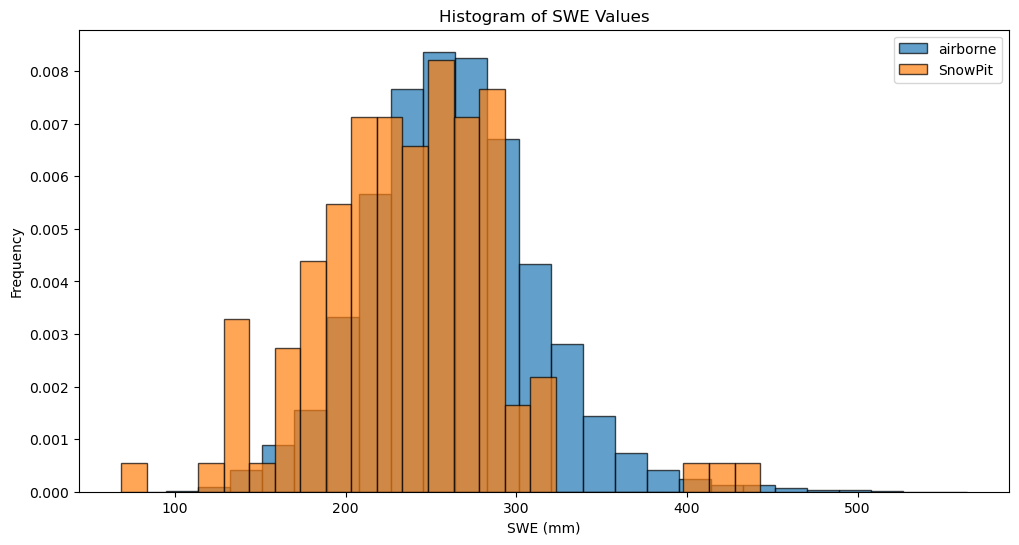

In [134]:
### and finally, add these to my histogram: 
# Plot histograms for sweNMO1 and sweLMO1

plt.figure(figsize=(12, 6))

# Histogram for sweNMO1
#plt.hist(sweNMO1, bins=15, edgecolor='black', alpha=0.7, label="sweNMO1", density=True)

# Histogram for sweLMO1
#plt.hist(sweLMO1, bins=15, edgecolor='black', alpha=0.7, label="sweLMO1", density=True)

# Histogram for our ASO flight: 
plt.hist(swe_list, bins=25, edgecolor='black', alpha=0.7, label= "airborne", density=True)

## Histogram for our SnowPitObs: 
plt.hist(swe_results_df['Total SWE (mm)'], bins=25, edgecolor='black', alpha=0.7, label= "SnowPit", density=True)

# Add a vertical line at x = 182
#plt.axvline(x=182.75, color='red', linestyle='--', linewidth=2, label="x = 182")

# Labels and title
plt.xlabel("SWE (mm)")
plt.ylabel("Frequency")
plt.title("Histogram of SWE Values")
plt.legend()

In [135]:
### py MC
ASO_df

,Index,X (WGS84 UTM 12N),Y (WGS84 UTM 12N),TWT (ns),Depth (cm),Density (kg/m3),SWE (mm),Velocity (m/ns),Permittivity
0,1167683,741832.069571,4.322818e+06,6.30,77.998048,240.714051,187.752261,0.249129,1.450087
1,1167684,741832.069571,4.322817e+06,6.00,74.189454,242.537355,179.937140,0.248810,1.453802
2,1167685,741832.069571,4.322816e+06,7.20,89.008790,242.836446,216.145783,0.248758,1.454412
3,1167686,741832.069571,4.322815e+06,7.00,86.518556,243.131157,210.353566,0.248707,1.455013
4,1167687,741832.069571,4.322814e+06,5.50,67.890626,244.996712,166.329802,0.248382,1.458821
...,...,...,...,...,...,...,...,...,...
278622,15488669,745924.310291,4.323832e+06,6.02,76.191407,217.786731,165.934775,0.253205,1.403775
278623,15488670,745924.310291,4.323831e+06,6.02,76.191407,217.786731,165.934775,0.253205,1.403775
278624,15492167,745925.310350,4.323834e+06,8.15,104.414058,200.810580,209.674475,0.256310,1.369968
278625,15492168,745925.310350,4.323833e+06,8.15,104.414058,200.810580,209.674475,0.256310,1.369968


In [136]:
import pyproj

# Define the file path
SWESARR_path = "/SWESARR/SNEX20_SWESARR_v01.csv"  # Adjust the path if needed


# Load the CSV file into a Pandas DataFrame
SWESARR_df = pd.read_csv(os.getcwd() + SWESARR_path)

# Rename columns for easier access
SWESARR_df.rename(columns={"Longitude (deg)": "Longitude", "Latitude (deg)": "Latitude"}, inplace=True)


# Define the transformer for WGS84 to UTM Zone 12N
transformer = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:32612", always_xy=True)

# Convert Longitude and Latitude to Easting and Northing
SWESARR_df["Easting"], SWESARR_df["Northing"] = transformer.transform(SWESARR_df["Longitude"].values, SWESARR_df["Latitude"].values)

# Save the results to a list
utm_list = SWESARR_df[["Easting", "Northing"]].values.tolist()

# Display the first few converted coordinates
print(utm_list[:5])

[[749783.8594040496, 4322345.270159769], [749775.8924740697, 4322345.017418138], [749767.838947161, 4322344.761937524], [749759.8720174503, 4322344.509212136], [749751.8184908162, 4322344.253747942]]


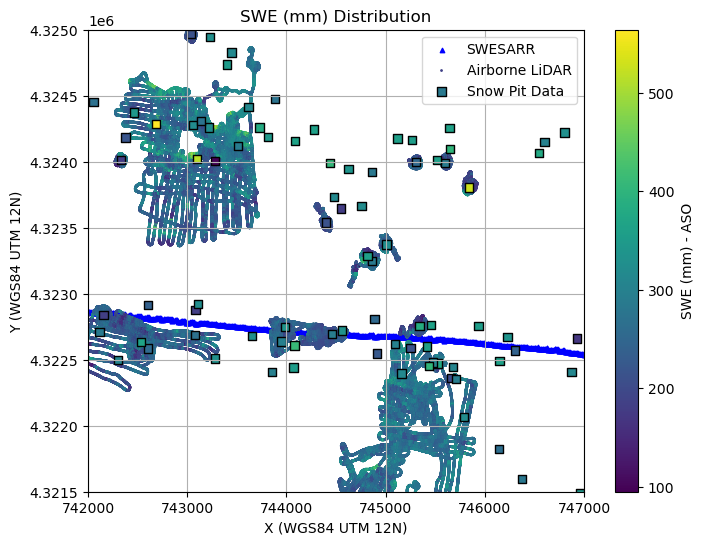

In [151]:
# Extract Easting, Northing, and SWE from Snow Pit data
easting = swe_results_df["Easting"]
northing = swe_results_df["Northing"]
swe_pits = swe_results_df["Total SWE (mm)"]


# Extract relevant data from ASO flight
x = ASO_df["X (WGS84 UTM 12N)"]
y = ASO_df["Y (WGS84 UTM 12N)"]
swe = ASO_df["SWE (mm)"]


# Create scatter plot with both datasets
plt.figure(figsize=(8, 6))

plt.scatter(SWESARR_df["Easting"], SWESARR_df["Northing"], s=10, marker = "^", color="blue", label="SWESARR")

# Plot ASO dataset
sc1 = plt.scatter(x, y, c=swe_list, s=1, cmap='viridis', marker='o', label="Airborne LiDAR")

# Plot Snow Pit data
sc2 = plt.scatter(easting, northing, c=swe_pits, cmap='viridis', marker='s', edgecolor='k', label="Snow Pit Data")

# Colorbar for ASO Data
plt.colorbar(sc1, label="SWE (mm) - ASO")

## set X, Y limits: 
plt.ylim([4.3215e6, 4.325e6]) 
plt.xlim([742000, 747000]) 

# Labels and Title
plt.xlabel("X (WGS84 UTM 12N)")
plt.ylabel("Y (WGS84 UTM 12N)")
plt.title("SWE (mm) Distribution")
plt.legend()
plt.grid(True)
plt.show()

In [155]:
import matplotlib.patches as patches

# Define footprint radius (500 m for radiometer, can be adjusted)
footprint_radius = 500  # meters

print(easting)

741282.7285837444


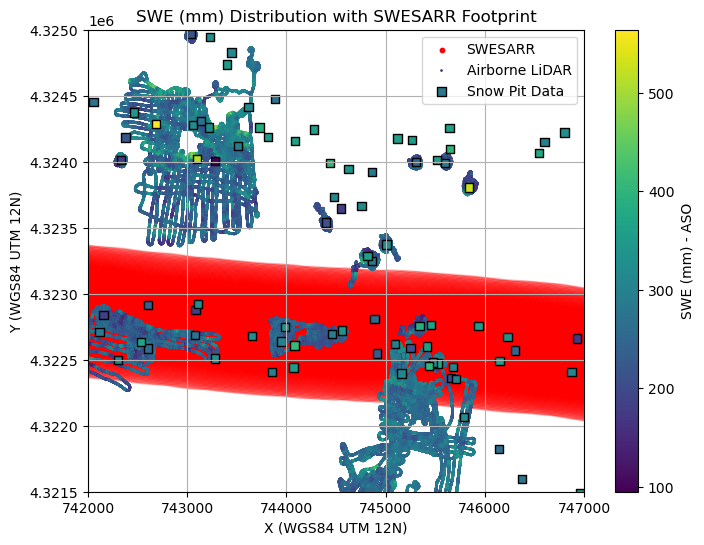

In [159]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Extract Easting, Northing, and SWE from Snow Pit data
easting = swe_results_df["Easting"]
northing = swe_results_df["Northing"]
swe_pits = swe_results_df["Total SWE (mm)"]


# Extract relevant data from ASO flight
x = ASO_df["X (WGS84 UTM 12N)"]
y = ASO_df["Y (WGS84 UTM 12N)"]
swe = ASO_df["SWE (mm)"]


# Plot SWESARR data
sc_swesarr = ax.scatter(SWESARR_df["Easting"], SWESARR_df["Northing"], s=10, marker="o", color="RED", label="SWESARR")
# Add SWESARR footprints as red transparent circles
for easting_SAR, northing_SAR in zip(SWESARR_df["Easting"], SWESARR_df["Northing"]):
    footprint_circle = patches.Circle((easting_SAR, northing_SAR), footprint_radius, color='red', alpha=0.02)
    ax.add_patch(footprint_circle)

    
# Plot ASO dataset
sc_aso = ax.scatter(x, y, c=swe, s=1, cmap='viridis', marker='o', label="Airborne LiDAR")

# Plot Snow Pit data
sc_pit = ax.scatter(easting, northing, c=swe_pits, cmap='viridis', marker='s', edgecolor='k', label="Snow Pit Data")



# Colorbar for ASO Data
cbar = plt.colorbar(sc_aso, label="SWE (mm) - ASO")

# Set X, Y limits
ax.set_ylim([4.3215e6, 4.325e6])
ax.set_xlim([742000, 747000])

# Labels and Title
ax.set_xlabel("X (WGS84 UTM 12N)")
ax.set_ylabel("Y (WGS84 UTM 12N)")
ax.set_title("SWE (mm) Distribution with SWESARR Footprint")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


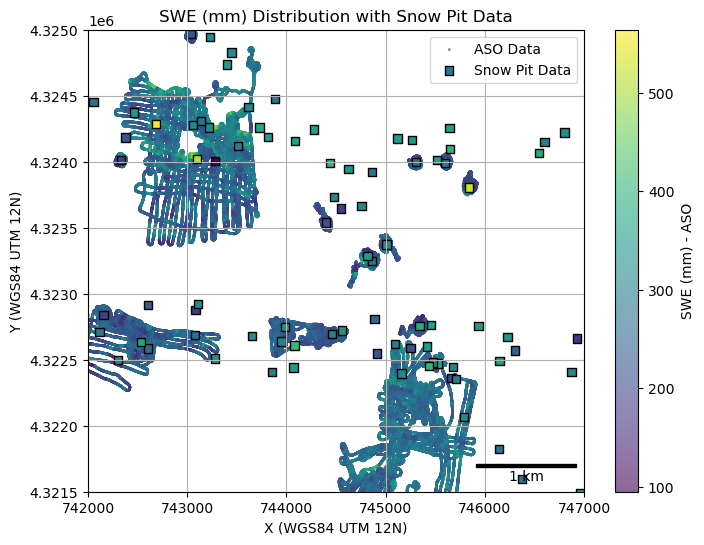

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# Create scatter plot with both datasets
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ASO dataset
sc1 = ax.scatter(x, y, c=swe, s=1, cmap='viridis', marker='o', alpha=0.6, label="ASO Data")

# Plot Snow Pit data
sc2 = ax.scatter(easting, northing, c=swe_pits, cmap='viridis', marker='s', edgecolor='k', alpha=1, label="Snow Pit Data")

# Colorbar for ASO Data
plt.colorbar(sc1, label="SWE (mm) - ASO")

# Set X, Y limits:
ax.set_ylim([4.3215e6, 4.325e6]) 
ax.set_xlim([742000, 747000]) 

# Add Scale Bar (UTM is in meters, so 1 km = 1000 meters)
scalebar = AnchoredSizeBar(ax.transData,
                           1000,  # Length of scale bar in meters (1 km)
                           '1 km',  # Label for scale bar
                           loc='lower right',  # Position on the map
                           pad=0.5,
                           color='black',
                           frameon=False,
                           size_vertical=20,  # Thickness of scale bar
                           fontproperties=fm.FontProperties(size=10))

ax.add_artist(scalebar)

# Labels and Title
ax.set_xlabel("X (WGS84 UTM 12N)")
ax.set_ylabel("Y (WGS84 UTM 12N)")
ax.set_title("SWE (mm) Distribution with Snow Pit Data")
ax.legend()
ax.grid(True)

plt.show()


In [87]:


# Convert UTM (EPSG:32612 for UTM Zone 12N) to Web Mercator (EPSG:3857)
transformer = Transformer.from_crs("EPSG:32612", "EPSG:3857", always_xy=True)

# Convert X, Y coordinates to Web Mercator
x_merc, y_merc = transformer.transform(x, y)

# Convert Snow Pit Data (Easting, Northing) to Web Mercator
easting_merc, northing_merc = transformer.transform(easting, northing)

# Create Figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ASO dataset
sc1 = ax.scatter(x_merc, y_merc, c=swe, cmap='viridis', marker='o', alpha=0.7, label="ASO Data")

# Plot Snow Pit Data
sc2 = ax.scatter(easting_merc, northing_merc, c=swe_pits, cmap='coolwarm', marker='s', edgecolor='k', alpha=1, label="Snow Pit Data")

# Add Background Map (Google Maps / OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.8)

# Colorbar
plt.colorbar(sc1, label="SWE (mm)")

# Labels and Title
ax.set_xlabel("Longitude (Web Mercator)")
ax.set_ylabel("Latitude (Web Mercator)")
ax.set_title("SWE (mm) Distribution with Basemap")
ax.legend()
ax.grid(True)

plt.show()


NameError: name 'Transformer' is not defined

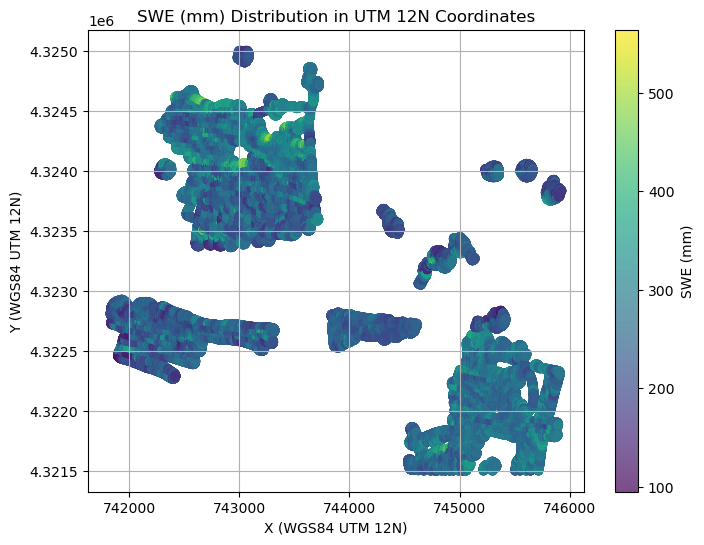

In [8]:


# Extract relevant data
x = ASO_df["X (WGS84 UTM 12N)"]
y = ASO_df["Y (WGS84 UTM 12N)"]
swe = ASO_df["SWE (mm)"]

# Create scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, c=swe, cmap='viridis', marker = 'o', alpha=0.7)
plt.colorbar(sc, label="SWE (mm)")
plt.xlabel("X (WGS84 UTM 12N)")
plt.ylabel("Y (WGS84 UTM 12N)")
plt.title("SWE (mm) Distribution in UTM 12N Coordinates")
plt.grid(True)
plt.show()

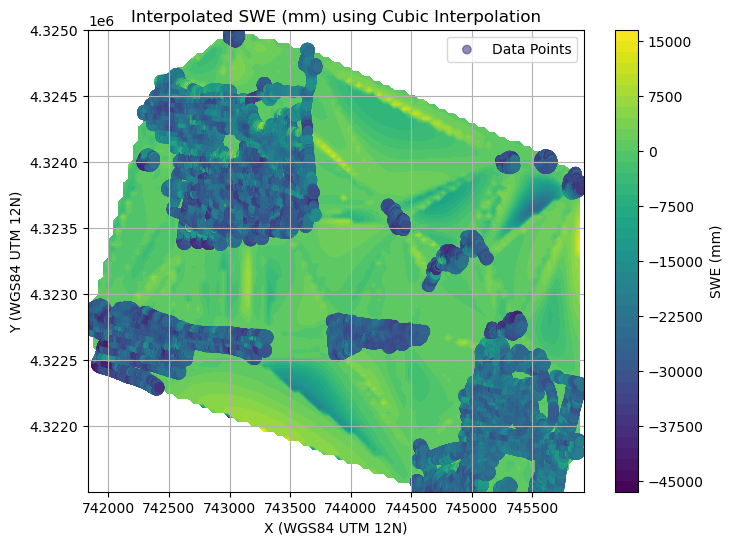

: 

In [ ]:
## this is bad interpolation 

from scipy.interpolate import griddata

# Define grid resolution
grid_res = 100

# Create grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), grid_res),
    np.linspace(y.min(), y.max(), grid_res)
)

# Perform interpolation using linear method (alternative to Kriging)
grid_swe = griddata((x, y), swe, (grid_x, grid_y), method='cubic')

# Plot interpolated SWE grid
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, grid_swe, cmap='viridis', levels=50)
plt.colorbar(label="SWE (mm)")
plt.scatter(x, y, c=swe, cmap='viridis', alpha=0.6, label="Data Points")
plt.xlabel("X (WGS84 UTM 12N)")
plt.ylabel("Y (WGS84 UTM 12N)")
plt.title("Interpolated SWE (mm) using Cubic Interpolation")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# Define grid resolution
grid_res = 100  

# Define grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), grid_res),
    np.linspace(y.min(), y.max(), grid_res)
)

# Perform Ordinary Kriging
OK = OrdinaryKriging(x, y, swe, variogram_model='spherical', verbose=False, enable_plotting=False)
grid_swe, ss = OK.execute("grid", grid_x, grid_y)

# Plot the interpolated SWE grid
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, grid_swe, cmap='viridis', levels=50)
plt.colorbar(label="SWE (mm)")
plt.scatter(x, y, c=swe, cmap='viridis', edgecolor='k', marker='o', alpha=0.6, label="Data Points")
plt.xlabel("X (WGS84 UTM 12N)")
plt.ylabel("Y (WGS84 UTM 12N)")
plt.title("Interpolated SWE (mm) using Kriging")
plt.legend()
plt.grid(True)
plt.show()

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [true_snow_depth, sigma_global, mu_global]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


/opt/anaconda3/envs/pymc_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
true_snow_depth[0],1.563,0.044,1.481,1.646,0.000,0.0,7862.0,5431.0,1.0
true_snow_depth[1],1.753,0.042,1.675,1.834,0.000,0.0,7297.0,5708.0,1.0
true_snow_depth[2],1.848,0.044,1.765,1.931,0.001,0.0,7645.0,5581.0,1.0
true_snow_depth[3],2.039,0.044,1.955,2.120,0.001,0.0,5700.0,5296.0,1.0
true_snow_depth[4],1.658,0.044,1.574,1.737,0.000,0.0,8054.0,5429.0,1.0


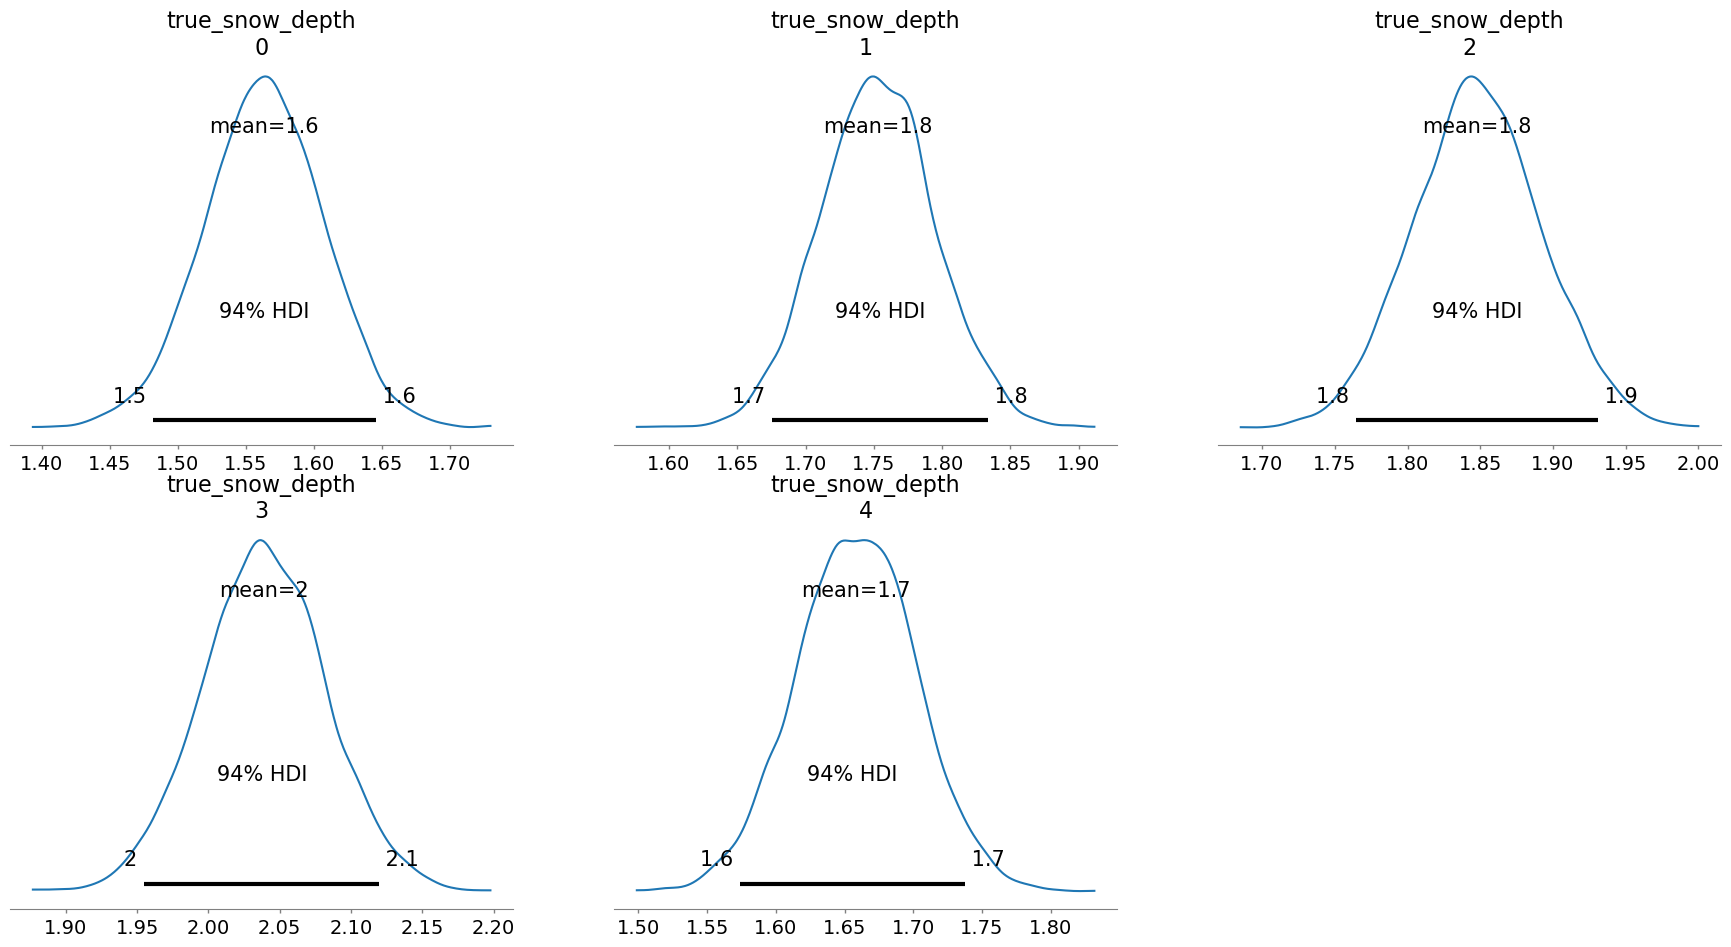

In [ ]:
import pymc3 as pm
import numpy as np
import arviz as az

# Simulated snow depth data for different locations (replace with real data)
n_locations = 5  # Number of locations
ground_snow_depth = np.array([1.55, 1.75, 1.85, 2.05, 1.65])  # Ground truth measurements
airborne1_snow_depth = np.array([1.5, 1.7, 1.8, 2.0, 1.6])  # Airborne 1 measurements
airborne2_snow_depth = np.array([1.6, 1.8, 1.9, 2.1, 1.7])  # Airborne 2 measurements

# Measurement uncertainty (these should be estimated from sensor specs or empirical analysis)
sigma_airborne1 = 0.15
sigma_airborne2 = 0.12
sigma_ground = 0.05  # More precise than airborne

# Bayesian hierarchical model
with pm.Model() as model:
    # Global mean and standard deviation for snow depth across all locations
    mu_global = pm.Normal("mu_global", mu=1.8, sigma=0.5)
    sigma_global = pm.HalfNormal("sigma_global", sigma=0.3)

    # True snow depth at each location (hierarchical prior)
    true_snow_depth = pm.Normal("true_snow_depth", mu=mu_global, sigma=sigma_global, shape=n_locations)

    # Likelihood for each measurement source
    airborne1_obs = pm.Normal("airborne1_obs", mu=true_snow_depth, sigma=sigma_airborne1, observed=airborne1_snow_depth)
    airborne2_obs = pm.Normal("airborne2_obs", mu=true_snow_depth, sigma=sigma_airborne2, observed=airborne2_snow_depth)
    ground_obs = pm.Normal("ground_obs", mu=true_snow_depth, sigma=sigma_ground, observed=ground_snow_depth)

    # Sampling from the posterior
    trace = pm.sample(2000, return_inferencedata=True, progressbar=True)

# Visualize results
az.plot_posterior(trace, var_names=["true_snow_depth"])
az.summary(trace, var_names=["true_snow_depth"])
